In [1]:
import cv2                       #importing dependencies
import os
from google.colab import drive
drive.mount('/content/gdrive')   #mounting google drive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


**PROCESSING OUR DATA**


In [2]:
count=0
dir='/content/gdrive/My Drive/mask_data'
for items in os.listdir(dir):               #getting the total number of files in the training directory
  for item in os.listdir(os.path.join(dir,items)):
     count=count+1
  print("There are ",count," files in training",items)
  count=0

dir='/content/gdrive/My Drive/mask_testdata'
for items in os.listdir(dir):               #getting the total number of files in the test directory
  for item in os.listdir(os.path.join(dir,items)):
     count=count+1
  print("There are ",count," files in validation",items)
  count=0


There are  669  files in training without_mask
There are  678  files in training with_mask
There are  117  files in validation with_mask
There are  109  files in validation without_mask


In [3]:
categories=os.listdir(dir)
label_pics=[i for i in range(len(categories))]  #creating a label dictionary for future references
label=dict(zip(label_pics,categories))


{0: 'with_mask', 1: 'without_mask'}

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data='/content/gdrive/My Drive/mask_data'
test_data='/content/gdrive/My Drive/mask_testdata'
train_datagen=ImageDataGenerator(rescale=1.0/255,      #getting and augmenting our training data for better accuracy
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')                                  

test_datagen=ImageDataGenerator(rescale=1.0/255)

train_generator=train_datagen.flow_from_directory(train_data,    
                                                  batch_size=20,
                                                  class_mode='categorical',
                                                  target_size=(300,300))
test_generator=test_datagen.flow_from_directory(test_data,           #getting our testing data along with folder and subfolder names
                                                batch_size=20,
                                                class_mode='categorical',
                                                target_size=(300,300))

Found 1347 images belonging to 2 classes.
Found 226 images belonging to 2 classes.


In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


**MAKING OUR CONVOLUTIONAL NEURAL NETWORK**

In [0]:
model=Sequential([
        Conv2D(32,(3,3),activation='relu',input_shape=(300,300,3)),  #Conv Layer 1
        MaxPooling2D(2,2),                                           #MaxPooling layer 1

        Conv2D(64,(3,3),activation='relu'),                          #Conv Layer 2         
        MaxPooling2D(2,2),                                           #MaxPooling Layer 2

        Conv2D(128,(3,3),activation='relu'),                          #Conv Layer 3
        MaxPooling2D(2,2),                                           #MaxPooling layer 3

        Conv2D(256,(3,3),activation='relu'),                         #Conv layer 4
        MaxPooling2D(2,2),                                           #MaxPooling layer 4  

        Flatten(),                                                   #First fully Connected Layer      
        Dropout(0.3),                                                #30% Dropout
        
        Dense(128,activation='relu'),                                #Second fully Connected Layer 
        Dense(2,activation='softmax')                                #2 Feature-Output layer      
])

In [0]:
#from tensorflow.keras.optimizers import RMSprop                      #used for tuning purposes only
model.compile(optimizer='adam',                                       #compiling model with these Hyperparameters
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
model.summary()                                                 #Summary of the CNN Model we created

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 33, 33, 256)      

**TRAINING OUR MODEL ON 10 EPOCHS(pretrained model is trained on about 60 epochs)**

In [9]:
history=model.fit(train_generator,validation_data=train_generator,  #Training starts
                  epochs=10,
                  validation_steps=50,
                  verbose=1
                  )

Epoch 1/10
68/68 [==============================] - 782s 11s/step - loss: 0.6652 - accuracy: 0.6466 - val_loss: 0.4519 - val_accuracy: 0.8440
Epoch 2/10
68/68 [==============================] - 63s 922ms/step - loss: 0.3223 - accuracy: 0.8834 - val_loss: 0.1204 - val_accuracy: 0.8977
Epoch 3/10
68/68 [==============================] - 60s 876ms/step - loss: 0.2554 - accuracy: 0.9005 - val_loss: 0.5118 - val_accuracy: 0.9007
Epoch 4/10
68/68 [==============================] - 60s 877ms/step - loss: 0.2456 - accuracy: 0.9102 - val_loss: 0.3436 - val_accuracy: 0.8530
Epoch 5/10
68/68 [==============================] - 60s 880ms/step - loss: 0.2326 - accuracy: 0.9102 - val_loss: 0.1602 - val_accuracy: 0.9372
Epoch 6/10
68/68 [==============================] - 59s 870ms/step - loss: 0.1899 - accuracy: 0.9317 - val_loss: 0.0765 - val_accuracy: 0.9524
Epoch 7/10
68/68 [==============================] - 58s 850ms/step - loss: 0.2042 - accuracy: 0.9258 - val_loss: 0.1912 - val_accuracy: 0.9139


In [0]:
model.save('/content/gdrive/My Drive/mask_trained2.h5')          #saving our model


**EVALUATING THE PERFORMANCE**

In [14]:
eval=model.evaluate(train_generator)                            #evaluating our model based on the test data
print("Loss is : ",eval[0])
print("Accuracy is : ",eval[1])

68/68 [==============================] - 36s 526ms/step
Loss is :  0.30212661623954773
Accuracy is :  0.936896800994873


**TESTING ON IMAGES**

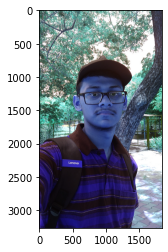

without_mask


In [20]:
import matplotlib.pyplot as plt
import numpy as np           
                              
face_img=cv2.imread('/content/gdrive/My Drive/me.jpg')  #testing on random images 
plt.imshow(face_img)
plt.show()
res=cv2.resize(face_img,(300,300))                           #resizing as per our input size
nor=res/255.0
reshaped_final=np.reshape(nor,(1,300,300,3))                    #reshaping the image
result=model.predict(reshaped_final)                                   #gives us 2 probabilities that sum to 1
highest_pred=np.argmax(result,axis=1)[0]                             #getting the max of the two probabilities
print(label[highest_pred])                                           #printing out from the the label dictionary